In [13]:
%matplotlib inline
import numpy as np
from time import time
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

from ts_outlier_detection import *
from ts_outlier_detection.plotting import *

In [25]:
## Timer

def record_runtime(inputs, func):
    times = []
    for i in tqdm(inputs):
        start = time()
        func(i)
        stop = time()
        times.append(stop-start)
    return np.array(times)

def plot_runtime_graph(inputs, func, title=None, xlabel=None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    times = record_runtime(inputs, func)
    ax.plot(inputs, times, 'k+')
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    ax.set_ylabel('Runtime (s)')
    ax.grid(True)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

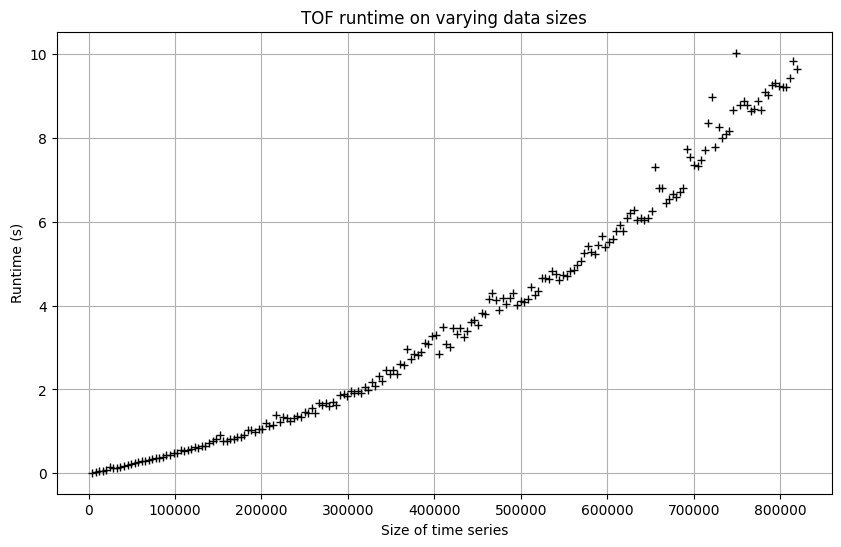

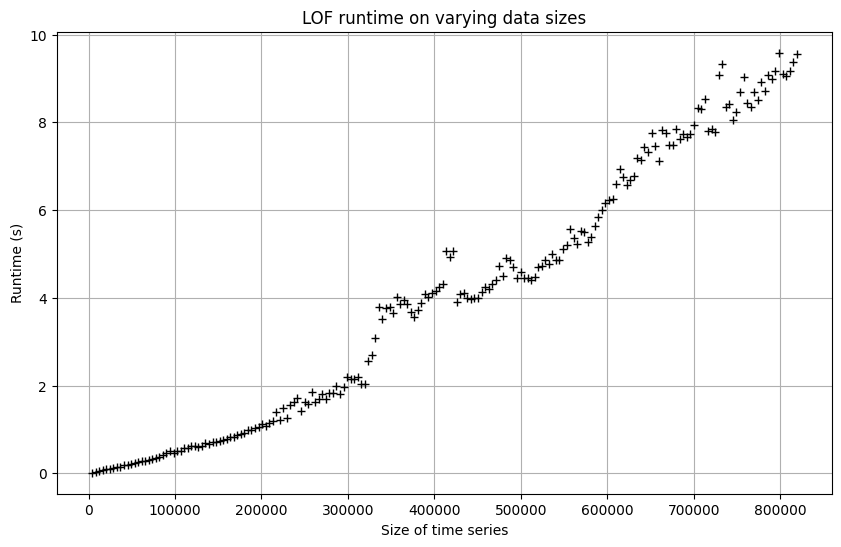

In [23]:
## data length

sample_rate = 2**12
upper_bound = 201
data = np.random.normal(size=(upper_bound*sample_rate, 1))

size_range = sample_rate * np.arange(1, upper_bound)
# TOF
ctf = TemporalOutlierFactor(dims=3, n_neighbors=10)
plot_runtime_graph(
    size_range,
    lambda i: ctf.fit(data[:i]),
    title='TOF runtime on varying data sizes',
    xlabel='Size of time series'
)
clf = WindowedLocalOutlierFactor(dims=3, n_neighbors=10)
# LOF
plot_runtime_graph(
    size_range,
    lambda i: clf.fit(data[:i]),
    title='LOF runtime on varying data sizes',
    xlabel='Size of time series'
)

  0%|          | 0/297 [00:00<?, ?it/s]

  0%|          | 0/297 [00:00<?, ?it/s]

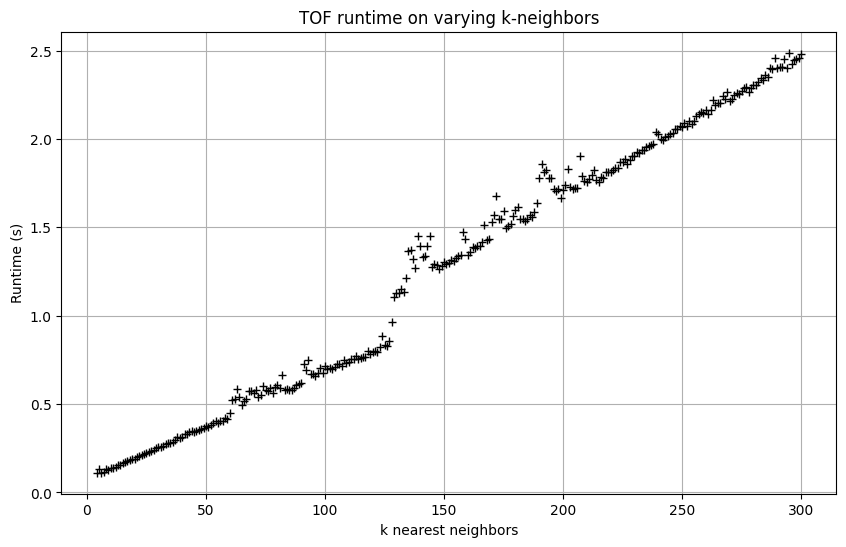

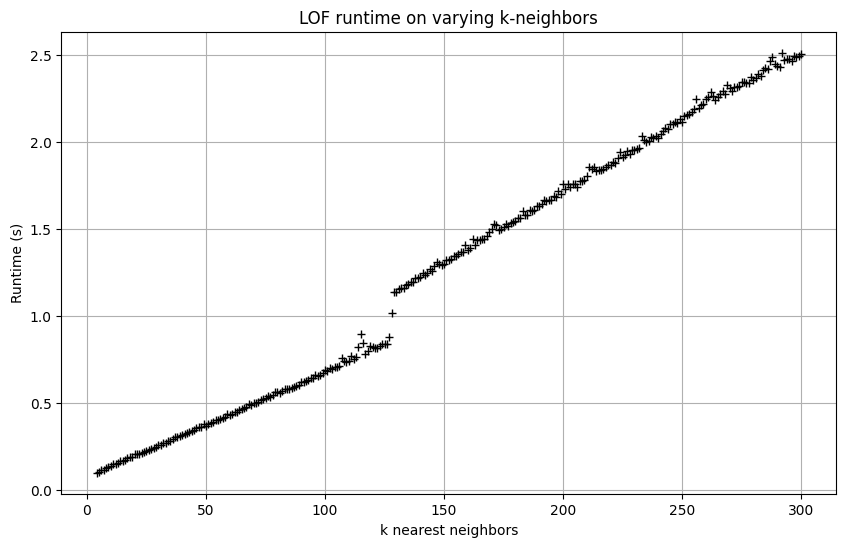

In [26]:
## k neighbors

neighbors = np.arange(4, 301)
data = np.random.normal(size=(2**15, 1))

def tof_func(i):
    ctf = TemporalOutlierFactor(dims=3, n_neighbors=i)
    ctf.fit(data)
    
def lof_func(i):
    clf = WindowedLocalOutlierFactor(dims=3, n_neighbors=i)
    clf.fit(data)

# TOF
plot_runtime_graph(
    neighbors,
    tof_func,
    title='TOF runtime on varying k-neighbors',
    xlabel='k nearest neighbors'
)
# LOF
plot_runtime_graph(
    neighbors,
    lof_func,
    title='LOF runtime on varying k-neighbors',
    xlabel='k nearest neighbors'
)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

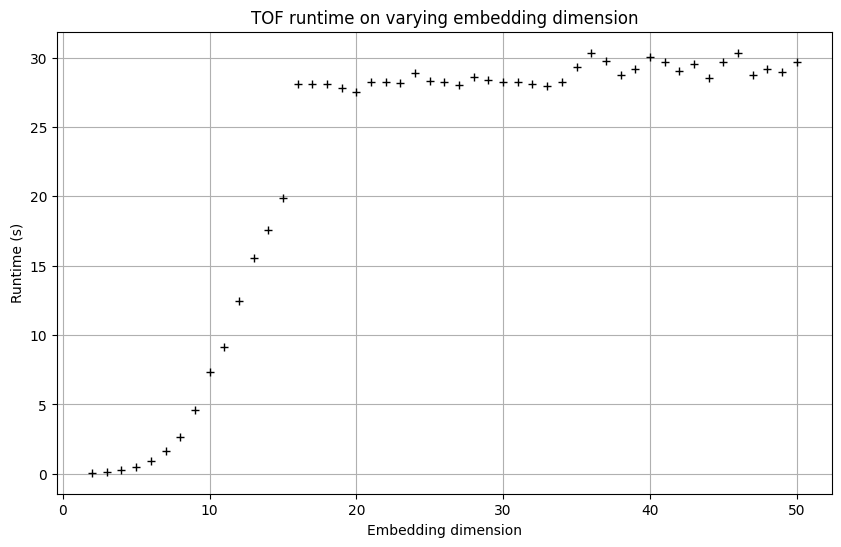

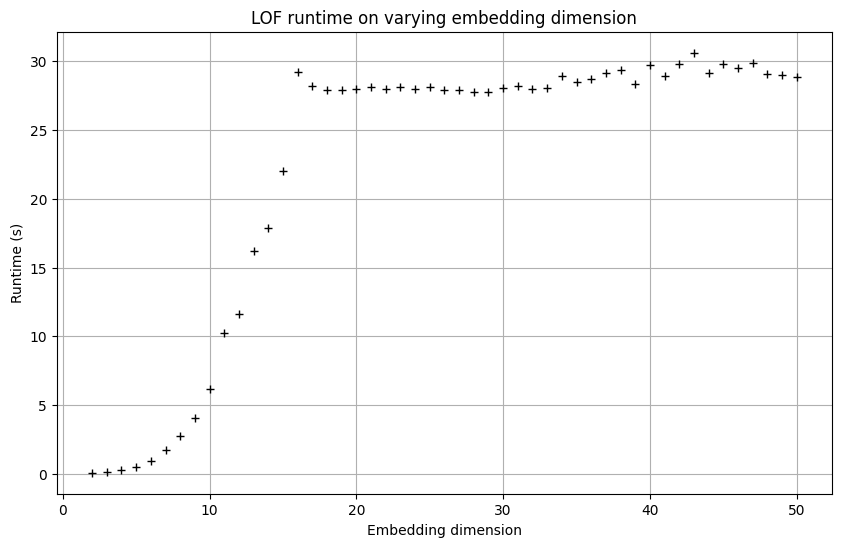

In [28]:
## embedding dimension

dim_range = np.arange(2, 51)
data = np.random.normal(size=(2**15, 1))

def tof_func(i):
    ctf = TemporalOutlierFactor(dims=i, n_neighbors=10)
    ctf.fit(data)
    
def lof_func(i):
    clf = WindowedLocalOutlierFactor(dims=i, n_neighbors=10)
    clf.fit(data)

# TOF
plot_runtime_graph(
    dim_range,
    tof_func,
    title='TOF runtime on varying embedding dimension',
    xlabel='Embedding dimension'
)
# LOF
plot_runtime_graph(
    dim_range,
    lof_func,
    title='LOF runtime on varying embedding dimension',
    xlabel='Embedding dimension'
)